<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/LibreriasPythonEjemplos__Vera_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vanesa Vera

#**Librerias en Python para implementar Regresión Lineal Simple y Multiple**

Veremos algunos ejemplos de usos de librerias de python para implementar Regresión Lineal Simple y Multiple

##1. **Scikit-learn**



Scikit-learn es una de las bibliotecas más utilizadas en Python para implementar algoritmos de aprendizaje automático. Proporciona una interfaz simple y eficiente que permite realizar regresión lineal tanto simple como múltiple.
Características:
- Proporciona herramientas rápidas y optimizadas.
- Permite evaluar modelos con métricas como el coeficiente de determinación ((R^2)) y el error cuadrático medio (ECM).
- Ideal para tareas de regresión con múltiples variables.

**EJEMPLOS DE APLICACIÓN**

*   REGRESIÓN LINEAL SIMPLE: Para este ejemplo utilizaremos horas de estudio como la variable independiente para predecir el puntaje en un examen (variable dependiente).


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = np.array([[2], [3], [4], [5], [6]])  # Horas de estudio (variable independiente)
y = np.array([60, 65, 70, 75, 80])       # Puntaje en el examen (variable dependiente)

# Crear y entrenar el modelo
modelo_simple = LinearRegression()
modelo_simple.fit(X, y)

# Predicción
horas_estudio = np.array([[10]])  # Predicción para 10 horas de estudio
prediccion = modelo_simple.predict(horas_estudio)
print(f"Predicción para 10 horas de estudio: {prediccion[0]}")


Predicción para 10 horas de estudio: 100.0




*   REGREIÓN LINEAL MULTIPLE: Para este ejemplo usaremos las mismas variables que usamos para el ejemplo anterior, solo que incluiremos datos adicionales, como prácticas completadas, para mejorar el modelo y realizar predicciones más precisas.



In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = np.array([[2, 1], [3, 2], [4, 3], [5, 3], [6, 4]])  # Horas de estudio y prácticas completadas
y = np.array([60, 65, 70, 75, 80])                      # Puntaje en el examen

# Crear y entrenar el modelo
modelo_multiple = LinearRegression()
modelo_multiple.fit(X, y)

# Predicción
nuevos_datos = np.array([[7, 5]])  # Predicción para 7 horas de estudio y 5 prácticas
prediccion = modelo_multiple.predict(nuevos_datos)
print(f"Predicción para 7 horas de estudio y 5 prácticas: {prediccion[0]}")


Predicción para 7 horas de estudio y 5 prácticas: 85.0


##2. **NumPy**

NumPy es una biblioteca clave para cálculos matemáticos en Python. Aunque no está especializada en aprendizaje automático como Scikit-learn, permite realizar cálculos básicos de regresión lineal, como el ajuste de líneas y polinomios.

**EJEMPLOS DE APLICACIÓN**

Para este ejemplo usaremos NumPy para calcular los coeficientes de uan ecuación lineal que ajusta los datos

*   REGRESIÓN LINEAL SIMPLE: Para la regresión simple ajustaremos una recta basada en horas de estudio y puntaje en el examen


In [8]:
import numpy as np

# Datos de ejemplo
X = np.array([2, 3, 4, 5, 6])  # Horas de estudio
y = np.array([60, 65, 70, 75, 80])  # Puntaje en el examen

# Cálculo de coeficientes
coef = np.polyfit(X, y, 1)  # Ajuste lineal
print(f"Pendiente: {coef[0]}, Intercepto: {coef[1]}")

# Predicción para 7 horas de estudio
prediccion = coef[0] * 7 + coef[1]
print(f"Predicción para 7 horas de estudio: {prediccion}")


Pendiente: 4.999999999999999, Intercepto: 50.0
Predicción para 7 horas de estudio: 85.0


En este caso Numpy por si sola no es ideal para manejar una regresion lineal multple, sin embargo lo podemos implementar usando funcionalidades como la manipulación de matrices y el álgebra lineal.

*   REGRESIÓN LINEAL MULTIPLE: Para la regresión mulltple, ampliaremos el analisis del ejemplo anterior incorporando más variables. Crearemos una matriz para las varaibles independientes y un vector para la varible dependiente. Agregaremos una columna de ceros para repreesentar el intercepto del modelo b0 y aplicaremos la formula de minimos cuadrados **$W = (X^TX)^{-1}X^TY$** donde x (matriz de variables independientes), y (vector de la variable dependiente), ***W***  (Vector de coeficientes estimados). Finalmente para calcular las predicciones, multiplicaremos la matriz (X) por el vector de coeficientes (***W*** ).

In [11]:
import numpy as np

# Datos de ejemplo
X = np.array([
    [2, 1],  # Horas de estudio, Prácticas completadas
    [3, 2],
    [4, 3],
    [5, 3],
    [6, 4]
])  # Variables independientes
y = np.array([60, 65, 70, 75, 80])  # Puntajes (variable dependiente)

# Agregar columna de unos para el intercepto
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añadir columna de "unos" a la matriz X

# Aplicar la fórmula de mínimos cuadrados: W = (X^T X)^-1 X^T y
W = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Mostrar los coeficientes del modelo
print(f"Coeficientes (intercepto, pendientes): {W}")

# Predicción para nuevos datos
nuevos_datos = np.array([[7, 5]])  # Ejemplo: 7 horas de estudio, 5 prácticas
nuevos_datos_b = np.c_[np.ones((nuevos_datos.shape[0], 1)), nuevos_datos]  # Agregar intercepto
prediccion = nuevos_datos_b @ W  # Predicción usando los coeficientes
print(f"Predicción para 7 horas de estudio y 5 prácticas completadas: {prediccion[0]}")



Coeficientes (intercepto, pendientes): [ 5.0000000e+01  5.0000000e+00 -2.7000624e-13]
Predicción para 7 horas de estudio y 5 prácticas completadas: 85.0000000000009


##3. **Pandas**

Pandas es una biblioteca para la manipulación y análisis de datos estructurados. Aunque no realiza regresión lineal directamente, es fundamental para preparar los datos antes de pasar a otras librerías como Scikit-learn o Statsmodels.

**EJEMPLOS DE APLICACIÓN**

Para este ejemplo usaremos Pandas para organizar y limpiar los datos antes de aplicar el modelo de regresión, creando un DataFrame con variables independientes y dependientes para facilitar el análisis.


In [12]:
import pandas as pd

# Crear DataFrame con los datos
data = {
    'Horas de Estudio': [2, 3, 4, 5, 6],
    'Prácticas Completadas': [1, 2, 3, 3, 4],
    'Puntaje en el Examen': [60, 65, 70, 75, 80]
}
df = pd.DataFrame(data)

# Visualizar los datos
print(df)

# Separar variables independientes y dependientes
X = df[['Horas de Estudio', 'Prácticas Completadas']]  # Variables independientes
y = df['Puntaje en el Examen']  # Variable dependiente


   Horas de Estudio  Prácticas Completadas  Puntaje en el Examen
0                 2                      1                    60
1                 3                      2                    65
2                 4                      3                    70
3                 5                      3                    75
4                 6                      4                    80


Ahora usaremos **Scikit-learn** para realizar una regresión simple

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Usar solo 'Horas de Estudio' para regresión simple
X_simple = df[['Horas de Estudio']]  # Variable independiente
y_simple = df['Puntaje en el Examen']  # Variable dependiente

# Crear y entrenar el modelo
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_simple)

# Coeficientes del modelo
print(f"Intercepto: {modelo_simple.intercept_}")
print(f"Pendiente: {modelo_simple.coef_[0]}")

# Crear un DataFrame para la predicción
datos_prediccion = pd.DataFrame({'Horas de Estudio': [7]})
prediccion = modelo_simple.predict(datos_prediccion)
print(f"Predicción para 7 horas de estudio: {prediccion[0]}")



Intercepto: 50.0
Pendiente: 4.999999999999999
Predicción para 7 horas de estudio: 85.0


Usando los mismos datos, agregaremos otra variable independiente para hacer una regresión multiple

In [18]:
import pandas as pd

# Crear un DataFrame para la predicción
nuevos_datos = pd.DataFrame({'Horas de Estudio': [7], 'Prácticas Completadas': [5]})


# Obtener el intercepto y las pendientes
intercepto = modelo_multiple.intercept_
pendientes = modelo_multiple.coef_

# Mostrar los resultados
print(f"Intercepto: {intercepto}")
print(f"Pendientes: {pendientes}")

# Realizar la predicción
prediccion_multiple = modelo_multiple.predict(nuevos_datos)
print(f"Predicción para 7 horas de estudio y 5 prácticas completadas: {prediccion_multiple[0]}")


Intercepto: 50.0
Pendientes: [ 5.00000000e+00 -1.20191054e-15]
Predicción para 7 horas de estudio y 5 prácticas completadas: 85.0


##4. **Matplotlib**

Matplotlib es una biblioteca para la visualización de datos. No se usa para cálculos de regresión, pero sí para graficar la relación entre las variables y visualizar el modelo ajustado.

**EJEMPLOS DE APLICACIÓN**

Para este ejemplo usaremos Matplotlib para crear gráficos que muestren la relación entre las horas de estudio y los puntajes en el examen.

*   EJEMPLO REGRESIÓN LINEAL SIMPLE



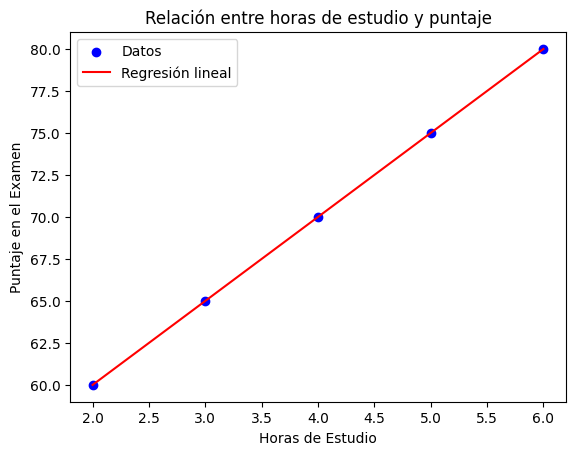

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
X = np.array([2, 3, 4, 5, 6])  # Horas de estudio
y = np.array([60, 65, 70, 75, 80])  # Puntaje en el examen

# Ajuste de regresión lineal
coef = np.polyfit(X, y, 1)  # Pendiente e intercepto

# Crear gráfico
plt.scatter(X, y, color='blue', label='Datos')  # Puntos de datos
plt.plot(X, coef[0] * X + coef[1], color='red', label='Regresión lineal')  # Línea ajustada

# Personalizar gráfico
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.title('Relación entre horas de estudio y puntaje')
plt.legend()

# Mostrar gráfico
plt.show()
